In [207]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as rnd
import random
import math
import copy

## 0. Parameters settings

In [208]:
num_pop = 100
dimension = 2
size = 7 #(-100<= X <=100 by binary)

crossover_prob = 0.7 # 0.7, 0.8, 0.9
mutation_prob = 0.05 # 0.05, 0.1, 0.15, 0.2

function_selected = "Sphere"

## 1. Functions

### 1.1. About chromosomes

In [209]:
"""
Generate random solution
"""
def generate_random_solution(size):
    solution = []
    chromosome = []
    sign = []
    
    # Chromosome
    current_size = 0
    while current_size < size:
        chromosome.append(random.randint(0,1))
        current_size = current_size + 1
    
    # Sign + -
    sign_candidate = [-1, 1]
    sign.append(random.choice(sign_candidate))

    # Merge solution
    solution.append(chromosome)
    solution.append(sign)
    # print(solution)

    return solution

"""
Chromosome genotype solution value function
"""

def chromosome_bin_to_decimal(chromosome): 
    #
    power = len(chromosome[0])-1    
    sum = 0
    
    #
    for idx in range(0,len(chromosome[0])):
        sum = sum + (chromosome[0][idx]) * (2**power)
        power = power - 1
    
    return sum * chromosome[1][0]


### 1.2. Objective functions

In [210]:
"""
Sphere function(objective)
input: decimal
"""
def Sphere_function(x):
    return x**2


In [211]:
"""
Calculate objective function and judge the best solution
"""

def calculate_objective_function(solution_set):

    value_set = []
    for sol_idx in range(0, len(solution_set)):
        
        sum = 0
        
        if function_selected == 'Sphere':    
            for dim in range(0,dimension):
                sum = sum + Sphere_function(chromosome_bin_to_decimal(solution_set[sol_idx][dim]))
            value_set.append(sum)

    # print(value_set)
    
    return value_set

### 1.3. About selection

In [212]:
"""
Calculate objective function and compose selection probability (1st: 50%, 2nd: 25%, 3rd: 12.5% ...)
"""

def calculate_obj_and_compose_selection_probability(solution_set):

    value_set = calculate_objective_function(solution_set)
    
    # Ascending
    temp_df = pd.DataFrame({"index":(range(0,num_pop)), "obj.val": value_set})
    temp_df = temp_df.sort_values('obj.val', ascending=True)
    increasing_index = temp_df['index'].values.tolist()
       
    #
    selection_prob = [-999 for i in range(0,num_pop)]
    sum1_idx = 0
    for count in range(0,(num_pop-1)):
        #
        # print(f'{count}: {increasing_index}')
        where_point = increasing_index.index(count)
        selection_prob[where_point] = 0.5*(0.5)**(count)
        sum1_idx = sum1_idx + 0.5*(0.5)**(count)
    
    where_point = increasing_index.index(num_pop-1)
    selection_prob[where_point] = 1 - sum1_idx
    
    # print(f'selection_prob: {selection_prob}')
            
    return selection_prob

### 1.4. Crossver and Mutation

In [213]:
"""
One-point crossover
: between same dimension

"""
def execute_crossover_standard(solution_1, solution_2):
    
    solution_1_tmp = copy.deepcopy(solution_1)
    solution_2_tmp = copy.deepcopy(solution_2)
    
    # Crossover
    dim = 0
    while dim < dimension:
        
        # Save current solutions
        current_sol1 = solution_1_tmp[dim][0]
        current_sol2 = solution_2_tmp[dim][0]
        # print(f'{current_sol1}\n{current_sol2}')
        
        # Copy the new solution from the current solutions
        new_sol1 = copy.deepcopy(current_sol1)
        new_sol2 = copy.deepcopy(current_sol2)
        
        # Find location for one-point crossover
        point_loc = random.randint(1,(len(current_sol1)-1))
        # print(f'point_loc: {point_loc}')
        for loc_idx in range(0, point_loc):
            
            new_sol1[loc_idx], new_sol2[loc_idx] = new_sol2[loc_idx], new_sol1[loc_idx]
        
        # print(f'{new_sol1}\n{new_sol2}')
        
        # Replace current with new solution
        solution_1_tmp[dim][0] = new_sol1
        solution_2_tmp[dim][0] = new_sol2
        
        # Update
        dim = dim + 1

    # print(f'{solution_1_tmp}\n{solution_2_tmp}')
    return solution_1_tmp, solution_2_tmp

"""
Modified crossover: crop & merge
"""
def execute_crossover_modified(solution_1, solution_2):
    
    return 1


"""
Standard mutation
: select only one
"""
def execute_mutation_standard(new_solution_1, new_solution_2):

    remember_signal = -99
    # Select
    if random.random() <= 0.5:
        mutation_target_chromosome = copy.deepcopy(new_solution_1)
        remember_signal = 1
    else:
        mutation_target_chromosome = copy.deepcopy(new_solution_2)
        remember_signal = 2
        
    # print("!: ",remember_signal)

    # Choose the location randomly along all dimension 
    dim = 0
    while dim < dimension:
        temp_chromosome = mutation_target_chromosome[dim][0]
        # print(temp_chromosome)
        
        point_loc = random.randint(0,(len(temp_chromosome)-1))
        
        # print(f'{point_loc}: {temp_chromosome[point_loc]}')
        
        if temp_chromosome[point_loc] == 0:
            temp_chromosome[point_loc] = 1
        else:
            temp_chromosome[point_loc] = 0
            
        # print(temp_chromosome)
        # print("\n")
        dim = dim + 1

    if remember_signal == 1:
        new_solution_1 = copy.deepcopy(mutation_target_chromosome)
    elif remember_signal == 2:
        new_solution_2 = copy.deepcopy(mutation_target_chromosome)
    else:
        print("error")
        
    return new_solution_1, new_solution_2

"""
Modified mutation
: select 1~3
"""
def execute_mutation_modified(new_solution_1, new_solution_2):
    pass


## 2. Generate initial population
[[0, 0, 1, 0, 0, 0, 0], [sign]]

In [214]:
"""
Example of chromosome
"""
chromosome = generate_random_solution(size)
val = chromosome_bin_to_decimal(chromosome)

print(chromosome)
print(val)

[[1, 1, 0, 0, 1, 1, 1], [1]]
103


In [215]:
"""
Generate intial population
"""
solution_set = []

successful_pop = 1
while successful_pop <= num_pop:
    
    # Generate    
    temp_solution_set = []
    success_dim = 0
    while success_dim < dimension:
        temp_chromosome = generate_random_solution(size)
        val = chromosome_bin_to_decimal(temp_chromosome)
    
        # for the warm initial solution: -100 ~ +100
        if (val >= -100) &  (val <= 100):
            temp_solution_set.append(temp_chromosome)
            success_dim = success_dim + 1
        else:
            pass
            # print(f'Infeasible!...')
    # Append
    solution_set.append(temp_solution_set)
    # print(f'Generated num of population: {successful_pop}')
    
    # Update
    successful_pop = successful_pop + 1
    
# OUTPUT: solution_set

In [216]:
for i in range(0, len(solution_set)):
    
    print(solution_set[i])

[[[0, 1, 0, 1, 1, 1, 1], [-1]], [[0, 0, 1, 1, 1, 1, 1], [-1]]]
[[[0, 0, 0, 1, 0, 1, 1], [-1]], [[1, 0, 0, 1, 1, 0, 1], [1]]]
[[[0, 1, 1, 1, 1, 0, 0], [1]], [[1, 0, 1, 1, 1, 0, 0], [-1]]]
[[[0, 1, 1, 0, 0, 0, 0], [-1]], [[0, 1, 1, 0, 0, 1, 0], [1]]]
[[[0, 1, 0, 1, 0, 1, 0], [-1]], [[1, 0, 0, 1, 1, 0, 1], [1]]]
[[[0, 0, 1, 1, 1, 0, 1], [1]], [[1, 0, 0, 1, 1, 1, 0], [1]]]
[[[0, 0, 1, 1, 1, 0, 0], [1]], [[1, 0, 1, 0, 0, 0, 0], [1]]]
[[[0, 0, 1, 0, 1, 0, 0], [1]], [[1, 0, 1, 0, 0, 0, 1], [1]]]
[[[0, 0, 0, 0, 0, 0, 0], [1]], [[0, 1, 1, 0, 0, 0, 0], [-1]]]
[[[1, 0, 1, 1, 0, 1, 0], [1]], [[0, 1, 1, 1, 0, 0, 0], [-1]]]
[[[0, 1, 1, 0, 0, 1, 0], [1]], [[1, 0, 0, 0, 1, 0, 0], [1]]]
[[[0, 1, 0, 0, 1, 0, 1], [1]], [[1, 0, 0, 1, 0, 1, 1], [-1]]]
[[[0, 0, 1, 1, 0, 0, 0], [-1]], [[0, 1, 0, 1, 0, 1, 1], [-1]]]
[[[0, 1, 1, 1, 0, 0, 1], [1]], [[0, 0, 1, 1, 0, 1, 1], [1]]]
[[[0, 0, 1, 1, 1, 0, 1], [-1]], [[1, 0, 0, 0, 0, 0, 1], [-1]]]
[[[0, 1, 1, 1, 1, 0, 1], [1]], [[0, 1, 0, 0, 0, 1, 0], [1]]]
[[[0, 0, 1,

## 3. Roulette-wheel selection

In [217]:
"""
Set the roulette-wheel and select two individual solutions
"""
obj_list = calculate_objective_function(solution_set)
print(obj_list)

# selection probability based on fitness values
selection_prob = calculate_obj_and_compose_selection_probability(solution_set)
print(selection_prob)


# select only two chromosomes within 1~Npop
num_list = list(range(0,(num_pop)))
print(num_list)


selected_pop = np.random.choice(num_list, 2, p=selection_prob, replace=False)
print(selected_pop)


[3170, 6050, 12064, 4804, 7693, 6925, 7184, 6961, 2304, 11236, 7124, 6994, 2425, 3978, 5066, 4877, 5668, 1480, 5204, 2650, 11645, 9505, 306, 9725, 9434, 11629, 1306, 13770, 3037, 3233, 5041, 9161, 10378, 2330, 14005, 7585, 9805, 8605, 5077, 10625, 6705, 3517, 8410, 7993, 13273, 6525, 11554, 7561, 8941, 8264, 4993, 1665, 7816, 5120, 15338, 6290, 6305, 9809, 5498, 4813, 8468, 10674, 3848, 13073, 12580, 11009, 4996, 3626, 13345, 8689, 6976, 1480, 9162, 5506, 4225, 1700, 3965, 970, 8917, 4608, 9810, 5141, 1090, 325, 13757, 7120, 4096, 7065, 4041, 13572, 1530, 4122, 2512, 11168, 2708, 6065, 4145, 3077, 6977, 6757]
[1.1920928955078125e-07, 5.169878828456423e-26, 3.308722450212111e-24, 1.0339757656912846e-25, 7.450580596923828e-09, 2.117582368135751e-22, 3.814697265625e-06, 4.0389678347315804e-28, 2.220446049250313e-16, 1.3234889800848443e-23, 0.001953125, 5.820766091346741e-11, 0.0001220703125, 1.0097419586828951e-28, 9.5367431640625e-07, 2.524354896707238e-29, 1.862645149230957e-09, 3.15544

## 4. Crossover

In [218]:
"""
Execute crossover with crossover probability: select only two
"""
# Selected two solutions
solution_1 = solution_set[selected_pop[0]]
solution_2 = solution_set[selected_pop[1]]
print(f'current\n{solution_1}\n{solution_2}')

if random.random() <= crossover_prob:
    new_solution_1, new_solution_2 = execute_crossover_standard(solution_1, solution_2)
    print(f'new\n{new_solution_1}\n{new_solution_2}')


current
[[[0, 0, 0, 0, 0, 1, 1], [1]], [[0, 1, 0, 0, 1, 1, 1], [-1]]]
[[[0, 0, 1, 0, 1, 0, 1], [-1]], [[1, 0, 0, 1, 1, 1, 0], [1]]]
new
[[[0, 0, 1, 0, 1, 0, 1], [1]], [[1, 0, 0, 0, 1, 1, 1], [-1]]]
[[[0, 0, 0, 0, 0, 1, 1], [-1]], [[0, 1, 0, 1, 1, 1, 0], [1]]]


## 5. Mutation

In [219]:
"""
Execute muatation with crossover probability: select only one solution between two solutions
"""

print(f'current\n{new_solution_1}\n{new_solution_2}')
if random.random() <= mutation_prob: # mutation_prob
    new_solution_1, new_solution_2 = execute_mutation_standard(new_solution_1, new_solution_2)
    print(f'new\n{new_solution_1}\n{new_solution_2}')

current
[[[0, 0, 1, 0, 1, 0, 1], [1]], [[1, 0, 0, 0, 1, 1, 1], [-1]]]
[[[0, 0, 0, 0, 0, 1, 1], [-1]], [[0, 1, 0, 1, 1, 1, 0], [1]]]


## 6. Alternate

In [220]:
"""
Alternative I
"""
def alternative_1(solution_set, new_solution_1, new_solution_2):
   
    solution_set[selected_pop[0]] = new_solution_1
    solution_set[selected_pop[1]] = new_solution_2
    
    return solution_set

In [221]:
"""
Alternative II
"""
def alternative_2(solution_set, new_solution_1, new_solution_2):
    alt2_solution_set = copy.deepcopy(solution_set)
    alt2_obj_set = copy.deepcopy(calculate_objective_function(solution_set))

    
    if function_selected == 'Sphere':
        # new_solution_1
        sum_new1 = 0
        for dim in range(0,dimension):
            sum_new1 = sum_new1 + Sphere_function(chromosome_bin_to_decimal(new_solution_1[dim]))
        alt2_solution_set.append(new_solution_1)
        alt2_obj_set.append(sum_new1)


        # new_solution_2
        sum_new2 = 0
        for dim in range(0,dimension):
            sum_new2 = sum_new2 + Sphere_function(chromosome_bin_to_decimal(new_solution_2[dim]))
        alt2_solution_set.append(new_solution_2)
        alt2_obj_set.append(sum_new2)


    # Remove twice
    ##
    temp_df = pd.DataFrame({"index":(range(0,num_pop+2)), "obj.val": alt2_obj_set})
    # print(temp_df)
    temp_df = temp_df.sort_values('obj.val', ascending=True)
    # print(temp_df)
    increasing_index = temp_df['index'].values.tolist()
    
    # print(increasing_index)
    # print(alt2_obj_set)
     
    alt2_solution_set.pop(increasing_index[-1])
    alt2_obj_set.pop(increasing_index[-1])

    ##
    temp_df = pd.DataFrame({"index":(range(0,num_pop+1)), "obj.val": alt2_obj_set})
    # print(temp_df)
    temp_df = temp_df.sort_values('obj.val', ascending=True)
    # print(temp_df)
    increasing_index = temp_df['index'].values.tolist()
    
    # print(increasing_index)
    # print(alt2_obj_set)
     
    alt2_solution_set.pop(increasing_index[-1])
    alt2_obj_set.pop(increasing_index[-1])

    # print(alt2_obj_set)
    

    # Replace solution_set with alt2_solution_set
    return alt2_solution_set

## 7. Indicator plot(operators analysis)

In [222]:
"""
Take coordinates under dimension
"""
def take_coordinates(solution_set):
    
    x_set = []
    for sol_idx in range(0, len(solution_set)):
        
        sum = 0
        x_tmp = []
        if function_selected == 'Sphere':    
            for dim in range(0,dimension):
                x_tmp.append(chromosome_bin_to_decimal(solution_set[sol_idx][dim]))
            x_set.append(x_tmp)

    return x_set
        
    # return value_set

In [223]:
"""
Basis plot
"""
def basis_plot(solution_set, iteration):
    plot_for_indicators = take_coordinates(solution_set)
    x, y = zip(*plot_for_indicators)
    plt.scatter(x,y, s=15, color='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([-120, 120])      # X축의 범위: [xmin, xmax]
    plt.ylim([-120, 120]) 
    plt.title(f'Iteration: {iteration}, Crossover_prob: {crossover_prob}, Mutation_prob: {mutation_prob}')
    plt.show()

    print(f'plot_for_indicators: {plot_for_indicators}')

"""
Exploration
: Area of maximal radius circle
"""


"""
Exploitation
: (current area) / (initial area)
"""


print("!")


!


## @@ Iteration test @@

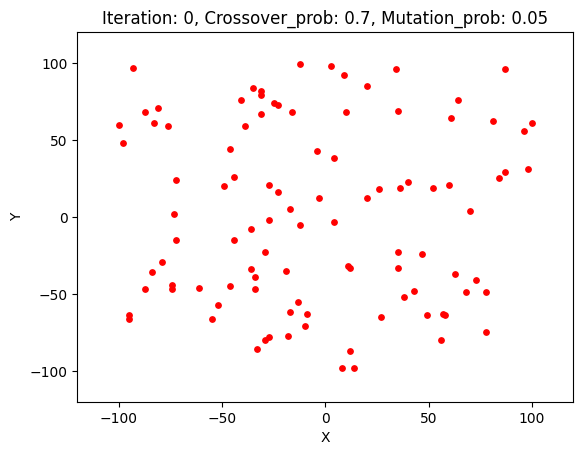

plot_for_indicators: [[49, -64], [-83, 61], [52, 19], [-61, -46], [-95, -66], [38, -52], [78, -49], [-27, -2], [-87, -47], [64, 76], [9, 92], [-33, -86], [26, 18], [20, 85], [-39, 59], [4, 38], [-9, -63], [-29, -80], [-74, -47], [-29, -23], [-44, 26], [-73, 2], [-74, -44], [-36, -34], [-55, -66], [-16, 68], [87, 29], [81, 62], [-31, 82], [58, -64], [43, -48], [40, 23], [-36, -8], [-25, 74], [-17, 5], [8, -98], [57, -63], [-27, 21], [35, 69], [-12, 99], [-84, -36], [10, 68], [-93, 97], [11, -32], [-35, 84], [-23, 16], [27, -65], [-27, -78], [36, 19], [34, 96], [-10, -71], [-52, -57], [-87, 68], [-34, -47], [-72, 24], [-3, 12], [-17, -62], [35, -33], [73, -41], [47, -24], [-12, -5], [60, 21], [-100, 60], [70, 4], [-13, -55], [-44, -15], [78, -75], [4, -3], [-19, -35], [-72, -15], [63, -37], [-34, -39], [-41, 76], [-31, 67], [68, -49], [98, 31], [35, -23], [-46, -45], [87, 96], [12, -87], [-49, 20], [-81, 71], [84, 25], [-76, 59], [-31, 79], [-18, -77], [14, -98], [96, 56], [56, -80], [-9

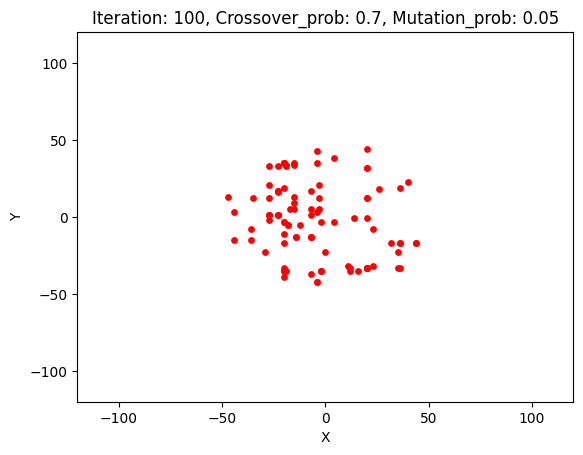

plot_for_indicators: [[-27, -2], [26, 18], [4, 38], [-29, -23], [40, 23], [-36, -8], [-17, 5], [-27, 21], [11, -32], [-23, 16], [36, 19], [-3, 12], [35, -33], [-12, -5], [-44, -15], [4, -3], [-19, -35], [35, -23], [-4, 43], [20, 12], [12, -33], [-19, 34], [-14, -13], [-14, -13], [-18, -5], [-7, -37], [12, -35], [-23, 1], [20, -33], [20, -33], [20, -33], [-47, 13], [-7, 1], [-4, -42], [-4, -42], [-23, 1], [-23, 1], [-15, 13], [-3, 21], [-27, 12], [20, -1], [-15, 35], [-23, 17], [-23, 17], [-23, 17], [-27, 1], [-27, 1], [-27, 1], [36, -17], [-20, -39], [-15, 9], [-7, 5], [-20, -35], [-20, -35], [-44, 3], [-4, 3], [-2, -35], [-2, -35], [-2, -35], [23, -8], [44, -17], [-15, 5], [-20, -17], [-2, -3], [-27, 33], [44, -17], [-36, -15], [36, -17], [-35, 12], [-20, -3], [20, 44], [32, -17], [14, -1], [-18, -5], [20, 12], [-15, 34], [16, -35], [20, 32], [20, 32], [-19, 33], [0, -23], [20, -33], [20, -33], [-7, -13], [-7, -13], [-7, -13], [-4, 35], [36, -33], [-20, 35], [-20, 35], [-20, 35], [-20

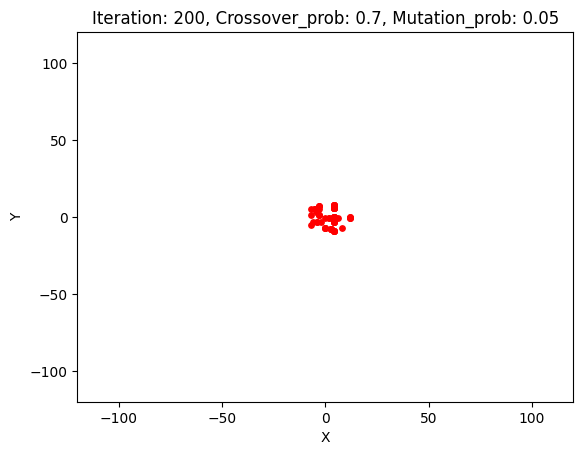

plot_for_indicators: [[4, -3], [-7, 1], [-7, 5], [-4, 3], [-2, -3], [-3, 5], [-3, 1], [4, -1], [4, -1], [4, -1], [4, -1], [4, -1], [8, -7], [4, -9], [-7, -5], [-5, 5], [-5, 5], [0, -7], [4, 0], [3, -8], [-6, -3], [-5, 5], [0, -7], [4, 0], [4, 0], [4, 0], [4, 0], [0, -7], [4, 0], [0, -7], [-4, -3], [-4, -3], [-3, 7], [-3, 7], [3, -8], [3, -8], [-3, 1], [2, -1], [4, 0], [-4, 3], [4, 0], [-4, 3], [4, 8], [4, -1], [4, -1], [4, -1], [4, -1], [4, -9], [4, -9], [4, -9], [4, -1], [4, -1], [4, -3], [4, -3], [4, -9], [4, 8], [4, -1], [3, -8], [-3, 1], [4, -1], [4, -3], [4, -3], [-5, 5], [12, 0], [-5, 5], [12, 0], [4, -9], [4, -1], [-5, 5], [4, -1], [4, 8], [4, 8], [4, -1], [4, -3], [-3, 7], [3, -8], [4, 6], [12, -1], [4, 6], [4, 6], [12, -1], [4, 6], [4, 6], [4, 6], [12, -1], [4, 6], [4, 6], [4, -1], [4, -1], [3, -8], [4, 6], [2, -1], [6, -1], [0, -1], [-4, 3], [4, -1], [-4, 3], [4, -1], [4, 8], [4, 8]]


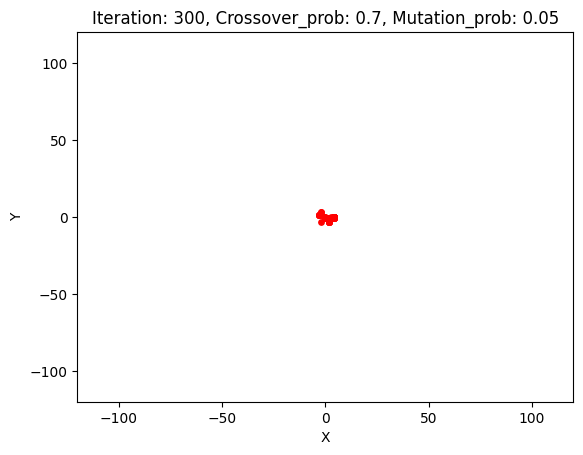

plot_for_indicators: [[-2, -3], [-3, 1], [4, -1], [4, -1], [4, -1], [4, -1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [2, -1], [4, 0], [4, 0], [-3, 1], [2, -1], [0, -1], [3, 0], [4, 0], [2, -3], [2, -1], [4, 0], [0, -1], [0, -1], [2, -3], [2, -3], [-2, 3], [-2, 3], [4, 0], [0, -1], [4, 0], [0, -1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [0, -1], [4, 0], [4, -1], [4, 0], [-3, 1], [4, 0], [4, 0], [-3, 1], [0, -1], [0, -1], [4, 0], [2, -3], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, -1], [4, 0], [4, -1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [4, -1], [4, 0], [4, 0], [4, -1], [2, -3], [4, 0], [2, -1], [4, 0], [2, -1], [2, -1], [0, -1], [2, -3], [0, 0], [0, 0], [-2, 1], [2, -3]]


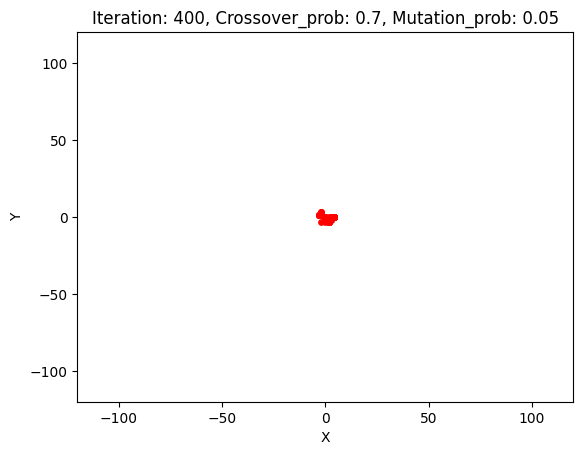

plot_for_indicators: [[-2, -3], [-3, 1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [2, -1], [4, 0], [4, 0], [-3, 1], [2, -1], [0, -1], [3, 0], [4, 0], [2, -3], [2, -1], [4, 0], [0, -1], [0, -1], [2, -3], [2, -3], [-2, 3], [-2, 3], [4, 0], [0, -1], [4, 0], [0, -1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [0, -1], [-3, 1], [4, 0], [4, 0], [-3, 1], [0, -1], [0, -1], [4, 0], [2, -3], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [4, 0], [4, 0], [2, -3], [4, 0], [2, -1], [4, 0], [2, -1], [2, -1], [0, -1], [2, -3], [0, 0], [0, 0], [-2, 1], [2, -3], [-2, 3], [3, 0], [0, -3], [-2, 1], [3, -2], [-2, 1], [3, -2], [-2, 1], [0, 0], [4, 0], [0, 0], [0, 0], [2, 0], [2, -3]]


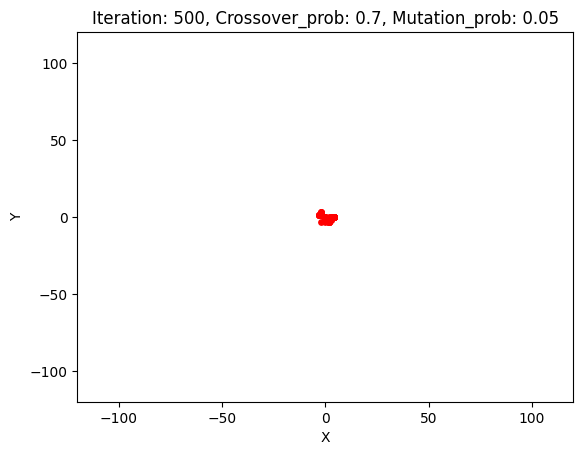

plot_for_indicators: [[-2, -3], [-3, 1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [2, -1], [4, 0], [4, 0], [-3, 1], [2, -1], [0, -1], [3, 0], [4, 0], [2, -3], [2, -1], [4, 0], [0, -1], [0, -1], [2, -3], [2, -3], [-2, 3], [-2, 3], [4, 0], [0, -1], [4, 0], [0, -1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [0, -1], [-3, 1], [4, 0], [4, 0], [-3, 1], [0, -1], [0, -1], [4, 0], [2, -3], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [4, 0], [4, 0], [2, -3], [4, 0], [2, -1], [4, 0], [2, -1], [2, -1], [0, -1], [2, -3], [0, 0], [0, 0], [-2, 1], [2, -3], [-2, 3], [3, 0], [0, -3], [-2, 1], [3, -2], [-2, 1], [3, -2], [-2, 1], [0, 0], [4, 0], [0, 0], [0, 0], [2, 0], [2, -3]]


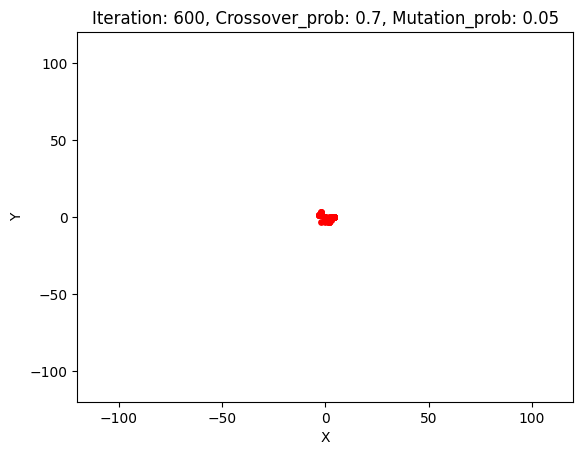

plot_for_indicators: [[-2, -3], [-3, 1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [2, -1], [4, 0], [4, 0], [-3, 1], [2, -1], [0, -1], [3, 0], [4, 0], [2, -3], [2, -1], [4, 0], [0, -1], [0, -1], [2, -3], [2, -3], [-2, 3], [-2, 3], [4, 0], [0, -1], [4, 0], [0, -1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [0, -1], [-3, 1], [4, 0], [4, 0], [-3, 1], [0, -1], [0, -1], [4, 0], [2, -3], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [4, 0], [4, 0], [2, -3], [4, 0], [2, -1], [4, 0], [2, -1], [2, -1], [0, -1], [2, -3], [0, 0], [0, 0], [-2, 1], [2, -3], [-2, 3], [3, 0], [0, -3], [-2, 1], [3, -2], [-2, 1], [3, -2], [-2, 1], [0, 0], [4, 0], [0, 0], [0, 0], [2, 0], [2, -3]]


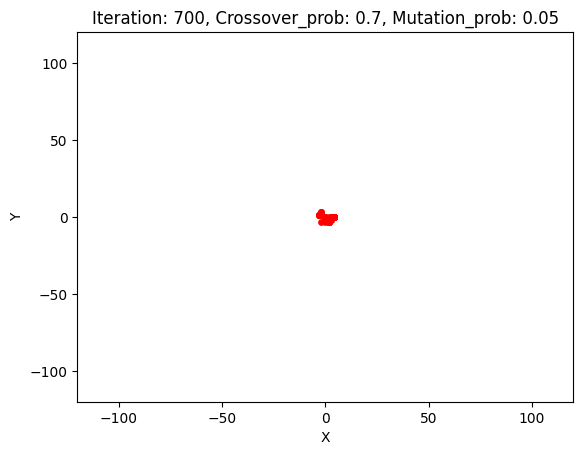

plot_for_indicators: [[-2, -3], [-3, 1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [2, -1], [4, 0], [4, 0], [-3, 1], [2, -1], [0, -1], [3, 0], [4, 0], [2, -3], [2, -1], [4, 0], [0, -1], [0, -1], [2, -3], [2, -3], [-2, 3], [-2, 3], [4, 0], [0, -1], [4, 0], [0, -1], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [0, -1], [-3, 1], [4, 0], [4, 0], [-3, 1], [0, -1], [0, -1], [4, 0], [2, -3], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [4, 0], [-3, 1], [4, 0], [4, 0], [2, -3], [4, 0], [2, -1], [4, 0], [2, -1], [2, -1], [0, -1], [2, -3], [0, 0], [0, 0], [-2, 1], [2, -3], [-2, 3], [3, 0], [0, -3], [-2, 1], [3, -2], [-2, 1], [3, -2], [-2, 1], [0, 0], [4, 0], [0, 0], [0, 0], [2, 0], [2, -3]]


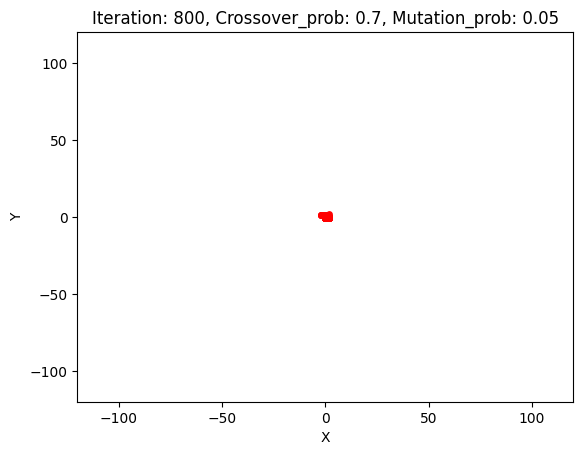

plot_for_indicators: [[2, -1], [2, -1], [0, -1], [2, -1], [0, -1], [0, -1], [0, -1], [0, -1], [0, -1], [0, -1], [0, -1], [2, -1], [2, -1], [2, -1], [0, -1], [0, 0], [0, 0], [-2, 1], [-2, 1], [-2, 1], [-2, 1], [0, 0], [0, 0], [0, 0], [2, 0], [0, 1], [2, 2], [2, 0], [2, 0], [2, -1], [0, -1], [2, -1], [0, -1], [0, 0], [0, 0], [2, -1], [2, -1], [2, -1], [2, 0], [2, 0], [0, 0], [-2, 1], [0, 1], [0, 0], [0, 1], [0, 0], [0, 1], [0, 0], [0, 1], [0, 0], [2, 0], [0, 1], [2, -1], [0, 1], [2, -1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 0], [0, 1], [2, -1], [2, -1], [0, 0], [0, 0], [0, 0], [0, 1], [0, 0], [2, 0], [0, 0], [2, 0], [0, 0], [2, 0], [2, 0], [0, 0], [0, -1], [2, -1], [0, -1], [0, 0], [0, -1], [2, 0], [0, 0], [0, 1], [0, 0], [0, 1], [0, 1], [0, -1], [0, 1], [0, -1], [0, 1], [0, -1]]


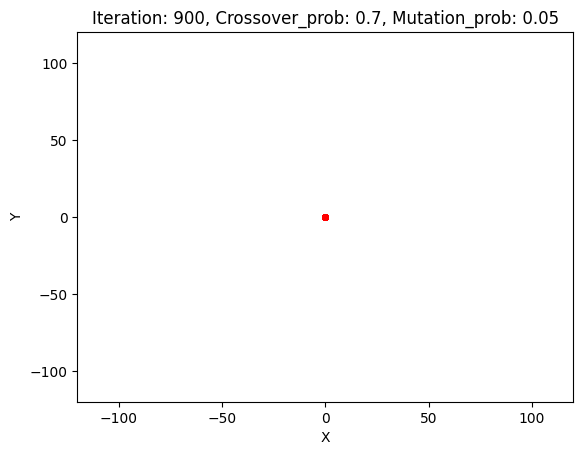

plot_for_indicators: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


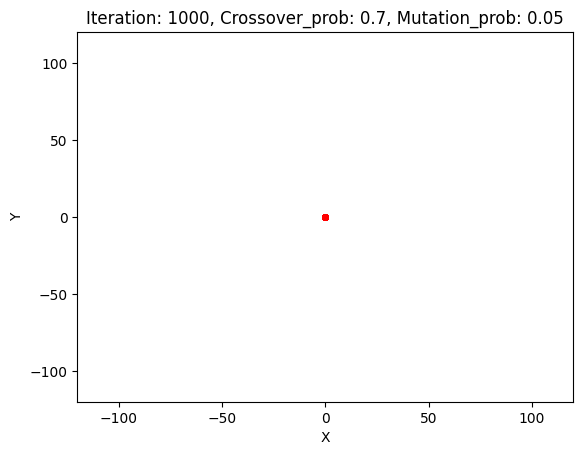

plot_for_indicators: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [224]:
"""
Generate intial population
"""
list_for_plot = []

#
solution_set = []
successful_pop = 1
while successful_pop <= num_pop:
    
    # Generate    
    temp_solution_set = []
    success_dim = 0
    while success_dim < dimension:
        temp_chromosome = generate_random_solution(size)
        val = chromosome_bin_to_decimal(temp_chromosome)
    
        # for the warm initial solution: -100 ~ +100
        if (val >= -100) &  (val <= 100):
            temp_solution_set.append(temp_chromosome)
            success_dim = success_dim + 1
        else:
            pass
            # print(f'Infeasible!...')
    # Append
    solution_set.append(temp_solution_set)
    # print(f'Generated num of population: {successful_pop}')
    
    # Update
    successful_pop = successful_pop + 1

iteration = 0
basis_plot(solution_set, iteration)



iteration = 1
while iteration <= 1000:

    """
    Set the roulette-wheel and select two individual solutions
    """

    # selection probability based on fitness values
    selection_prob = calculate_obj_and_compose_selection_probability(solution_set)

    # 1~Npop
    num_list = list(range(0,num_pop))
    selected_pop = np.random.choice(num_list, 2, p=selection_prob, replace=False)
    # print(selected_pop)

    """
    Execute crossover with crossover probability: select only two
    """
    # Selected two solutions
    solution_1 = solution_set[selected_pop[0]]
    solution_2 = solution_set[selected_pop[1]]
    # print(f'current\n{solution_1}\n{solution_2}')

    if random.random() <= crossover_prob:
        new_solution_1, new_solution_2 = execute_crossover_standard(solution_1, solution_2)
        # print(f'new\n{new_solution_1}\n{new_solution_2}')

    """
    Execute muatation with crossover probability: select only one solution between two solutions
    """

    # print(f'current\n{new_solution_1}\n{new_solution_2}')
    if random.random() <= mutation_prob: # mutation_prob
        new_solution_1, new_solution_2 = execute_mutation_standard(new_solution_1, new_solution_2)
    # print(f'current\n{new_solution_1}\n{new_solution_2}')


    """
    Alternative II
    """
    solution_set = alternative_2(solution_set, new_solution_1, new_solution_2)    
    
    
    """
    Evaluation
    """
    iterative_solution_set = calculate_objective_function(solution_set)
    
    # print(f'{iteration} | Best solution {solution_set[iterative_solution_set.index(min(iterative_solution_set))]}, value: {min(iterative_solution_set)}, index: {iterative_solution_set.index(min(iterative_solution_set))}')
    list_for_plot.append(min(iterative_solution_set))
    
    """
    Basis plot
    """
    if iteration%100 == 0:
        basis_plot(solution_set, iteration)
        
    

    
    
    # Update
    iteration = iteration + 1



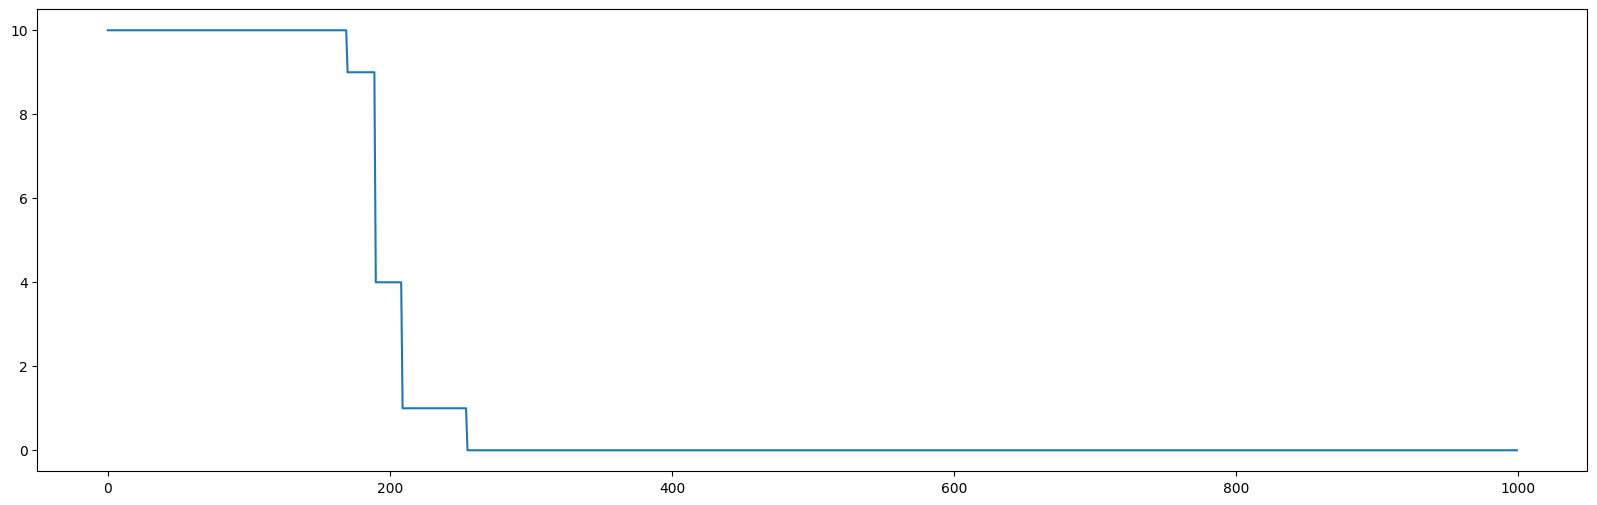

In [187]:
plt.figure(figsize=(20,6))
plt.plot(list_for_plot)
plt.show()

In [552]:
"""
Develop indicators(Exploration/Exploitation)
"""

'\nDevelop indicators(Exploration/Exploitation)\n'

## Dev note
- 전반적으로 오류나는거 체크(len 범위 착각)
- selection 할때 1, 2등에 거의 몰빵해야 함 예) 50*(1/2)**(r-100)
- Update하고 나서 feasibility 체크 따로 안 해도 될까?

In [722]:
for r in range(0, 100):
    print(50*(0.5)**(r))

50.0
25.0
12.5
6.25
3.125
1.5625
0.78125
0.390625
0.1953125
0.09765625
0.048828125
0.0244140625
0.01220703125
0.006103515625
0.0030517578125
0.00152587890625
0.000762939453125
0.0003814697265625
0.00019073486328125
9.5367431640625e-05
4.76837158203125e-05
2.384185791015625e-05
1.1920928955078125e-05
5.9604644775390625e-06
2.9802322387695312e-06
1.4901161193847656e-06
7.450580596923828e-07
3.725290298461914e-07
1.862645149230957e-07
9.313225746154785e-08
4.6566128730773926e-08
2.3283064365386963e-08
1.1641532182693481e-08
5.820766091346741e-09
2.9103830456733704e-09
1.4551915228366852e-09
7.275957614183426e-10
3.637978807091713e-10
1.8189894035458565e-10
9.094947017729282e-11
4.547473508864641e-11
2.2737367544323206e-11
1.1368683772161603e-11
5.6843418860808015e-12
2.8421709430404007e-12
1.4210854715202004e-12
7.105427357601002e-13
3.552713678800501e-13
1.7763568394002505e-13
8.881784197001252e-14
4.440892098500626e-14
2.220446049250313e-14
1.1102230246251565e-14
5.551115123125783e-15
2

In [673]:
print(len(selection_prob))

num_list = list(range(1,(num_pop+1)))
selected_pop = np.random.choice(num_list, 2, p=selection_prob, replace=False)



100


ValueError: probabilities contain NaN